<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Hypothesis Testing

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy, https://geostatsguy.github.io/GeostatsPyDemos_Book.  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository (0.0.1). Zenodo. https://zenodo.org/doi/10.5281/zenodo.12667035

[![DOI](https://zenodo.org/badge/777871341.svg)](https://zenodo.org/doi/10.5281/zenodo.12667035)

```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Hypothesis Testing**. 

**YouTube Lecture**: check out my lectures on:

* [Hypothesis Testing](https://youtu.be/rvt9UM148tQ?si=4GRsjw8XCIUzst5f)
* [Confidence Intervals](https://youtu.be/oaXCcTWcU04?si=MSxr1PtYO7ZDfmH2)
* [Bootstrap](https://youtu.be/wCgdoImlLY0?si=n0hHzQWAS4R1IpGg)

#### Motivation for Hypothesis Testing

We need to report uncertainty and significance of our results! Otherwise, we do not know if any of our results are meaningful. For example, if we collected 2 sample sets, one from well 1 and the other from well 2, we will want to know if the difference in the means are,

* **statistically significant** - suggesting that we may sampled 2 distinct populations

* **statistically insignificant** - suggesting that we may be sampling the same population (with respect to the mean)

We will take all the related information, for example, sample means, sample standard deviations, and number of samples and calculate the expected distribution of difference assuming the same population and then calculate the critical values that if exceeded indicate a significant difference.

<figure style="text-align: center;">
  <img src="_static/hypothesis/significance.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Average fraction of shale uncertainty models that appear to be different (left), but is that different significant (right).</figcaption>
</figure>

this is an illustration of the hypothesis testing approach that is not completely accurate (i.e., our sampling distribution is in standardized difference and not in difference), but communicates the concepts.

#### Hypothesis Testing Concepts

To understand hypothesis testing, we must understand the following concepts. Let's start with the hypothesis,

* **Hypothesis**- a statement about a population parameter, for example, $\mu_1 = \mu_2$. Note, we never use sample statistics, for example, $\overline{X_1} = \overline{X_2}$, because we know the sample statistics and there is no need to make any inference concerning them.

We start by accepting the null hypothesis, $H_0$, and then test it.

* **Null Hypothesis ($H0$)** and **Alternative Hypothesis ($H1$)** - two complementary hypotheses in a hypothesis testing problem

1. **$H_0$** – no effect, e.g. means are the same, one is not larger, difference due to limited samples and random effect
2. **$H_1$** – a significant difference, the effect we are checking for

To test the null hypothesis we calculate the,

* **Sampling Distribution** - the theoretical distributions given the null hypothesis is true, for example,

1. **Student’s t** - for Student's t‐test for comparing the means of two sample sets
2. **F‐distribution** - for the F-test for Comparing the variances of two sample sets
3. **Chi‐Square distribution** - for CHi-square test for comparing entire histograms of two sample sets

* **statistic** - a measure of difference in units of standard deviations from the 0 difference, generally calculated as the measure divided by standard error. The measure is the difference, for example, the difference in the means. Standard error integrates information such as sample standard deviations and number of samples such that the resulting statistic is in standard deviations and plots on the standard sampling distribution.

* **Hypothesis Test Result** - there are 2 possible outcomes from an hypothesis test,
  
1. **Reject the null hypothesis** - evidence to support the alternative hypothesis $H1$
2. **Fail to reject the null hypothesis** - retain the null hypothesis, $H0$ 

* **Error Types** - there are two possible errors with hypothesis testing,
  
1. **Type 1 error** - incorrectly rejecting the null hypothesis (false positive)
2. **Type 2 error** - incorrectly retaining the null hypothesis (false negative)

#### Example Hypotheses

Collected data from a new well. Does this new data come from the same population as the previous wells or is there a geological discontinuity?

Test if the means are the same between the new data and the old data.

$$𝐻_0: \mu_n = \mu_p$$
the well data is from the same population as the previous wells

$$𝐻_1: \mu_n \ne \mu_p$$
the well is from a different population than the previous wells

Applied a new lab measurement for permeability from core data.  Does the new method result in consistent amount of permeability variance?

Test if the variance is the same between the two methods.

$$𝐻_0: \sigma_{𝑚1}^2 = \sigma_{𝑚2}^2$$
the permeability variance of the two methods is the same

$$𝐻_1: \sigma_{𝑚1}^2 \ne \sigma_{𝑚2}^2$$
the permeability variance of the two methods is different

#### General Hypothesis Testing Method

Here's the steps for hypothesis testing, for the example of t-test for difference in means,

1. **Calculate the Test Statistic** - the distance in standard deviations on the sampling distribution from the null hypothesis of the observed outcome

2. **Look Up the Critical Value** - from the confidence level or alpha value, this is the percentile value of the lower and / or upper bound from the sampling distribution. This is available from a function or look up table given alpha, number of tails and possibly the degree of freedom.

3. **Compare the Test Statistic to the Critical Value** - with two possible outcomes,

* Fail to reject $𝐻_0$ - if statistic fails to exceed the critical value(s), for example,

$$-t_{critcial} \le \hat{t} \le t_{critical}$$
  
* Reject $𝐻_0$ - if statistic exceeds the critical value(s), for example,

$$\hat{t} < -t_{critical} \quad \text{or} \quad \hat{t} > t_{critical}$$

Later we will fill the details for calculating the test statistic, $\hat{t}$, and critical value, $t_{critical}$.

#### One and Two Tail Tests

Let's first visualize the one and two tail test and then explain the details,

<figure style="text-align: center;">
  <img src="_static/hypothesis/tails.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">One tail test (left), and two tail test (right).</figcaption>
</figure>

Here's a one tail test, is well 1 in better rock than well 2 (by average porosity)? In this case we are only testing if well 1's mean porosity is significantly greater than well 2's mean porosity.

* well 1 average porosity is less than or equal to the well 2 average porosity,

$$𝐻_0: \mu_1 \le \mu_2$$ 

* well 1 average porosity is greater than well 2 average porosity,

$$𝐻_1: \mu_1 > \mu_2$$

and now, here's a two tail test, are wells 1 and 2 in different (according to average porosity)? In this case we are testing for significant difference without concern for which well has a larger mean.

* well 1 & 2 average porosity are the same,

$$𝐻_0: \mu_1= \mu_2$$ 

* well 1 and 2 average porosity are the different,
  
$$𝐻_1: \mu_1 \ne \mu_2$$ 

The choice of one or two tail test also impacts the percentile applied. For a two tail test we split alpha over the lower and upper tails, so we use the percentile for,

$$
t_{critical} = \pm F^{-1}(\frac{\alpha}{2})
$$

while for a single tail test we order the measure so we only use the lower tail percentile for,

$$
t_{critical} = F^{-1}(\frac{\alpha}{2})
$$

#### Limitations of Hypothesis Testing 

Before we go any further, let's mention the limitations of hypothesis testing. This is really important, because these issues have caused hypothesis testing to fall out of favor in some scientific communities. 

Publication Bias – only publish results that reject the null, i.e., show significant results

* Recall, $\alpha$ probability of false positive

* Data mining for any effect will find insignificant differences that look significantly different (by random)
  
* Meta studies have indicated the possibility that many studies have selectively reported significant results

Very small sample sizes, poorly understood phenomenon

* we cannot demonstrate conformity with the test assumptions

<figure style="text-align: center;">
  <img src="_static/hypothesis/hans.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Clever Hans, the horse that could do math in the early 1900s. In fact, the horse was taking cues from the examiner. </figcaption>
</figure>

Other Data Issues, Poor Sampling Practice

* Contamination of sample, for example, the clever Hans effect where the examinee is taking cues from the examiner
  
* Placebo effect, impact of subject motivation

Due to these there is some mistakes and skepticism concerning the use of hypothesis testing in publications. Solutions include avoiding small sample sizes and reporting p-values instead of binary reject or fail to reject 

#### Pooled Variance Method for Difference in Means

For the Student’s t-test, equal variances, pooled variance method (William Gosset, 1876-1937), we state the hypotheses as,

$$𝐻_0: \mu_1= \mu_2$$ 
$$𝐻_1: \mu_1 \ne \mu_2$$ 

and then we use the Student's t distribution to model the sampling distribution and calculate the t-statistic as,

$$ 
\hat{t} = \frac{|\bar{x}_1 - \bar{x}_2|}{\sqrt{\left( \frac{1}{n_1} + \frac{1}{n_2} \right) \left( \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2} \right) }}
$$

where $\bar{x}_1$ and $\bar{x}_2$ are the sample means, $s_1^2$ and $s_2^2$ are the sample standard deviations, and $n_1$ and $n_2$ are the number of samples. 

and then we calculate the $t_{critical}$ as,

$$
t_{critical} = abs\left( t(\frac{\alpha}{2},𝑛_1 + 𝑛_2 − 2)\right)
$$

Then we fail to reject $𝐻_0$ if, 

$$-t_{critcial} \le \hat{t} \le t_{critical}$$

or reject $𝐻_0$ if,

$$\hat{t} < -t_{critical} \quad \text{or} \quad \hat{t} > t_{critical}$$

Note, this test assumes that the variables are Gaussian distributed, and the standard deviations are not significantly different.  

* If your sample size is large enough, the central limit theorem suggests that the sampling distribution of the sample mean will approach normality, even if the data itself is not normally distributed.

* In such cases, you may still use the t-test, but this assumes your sample sizes are sufficiently large (generally, n > 30 is considered acceptable).

#### Welch's t-test for Difference in Means

For the Student’s t-test for unequal variances, Welch’s t-test (Bernard Welch, 1911-1989), we again state the hypotheses as,

$$𝐻_0: \mu_1= \mu_2$$ 
$$𝐻_1: \mu_1 \ne \mu_2$$ 

and then we use the Student's t distribution to model the sampling distribution and calculate the t-statistic as,

$$
\hat{t} = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} 
$$

where $\bar{x}_1$ and $\bar{x}_2$ are the sample means, $s_1^2$ and $s_2^2$ are the sample standard deviations, and $n_1$ and $n_2$ are the number of samples. 

and then we calculate the $t_{critical}$ as,

$$
t_{critical} = abs\left( t(\frac{\alpha}{2},\nu)\right)
$$

where $\nu$ is calculated as, 

$$
\nu = \frac{\left( \frac{1}{n_1} + \frac{u}{n_2} \right)^2}{\frac{1}{n_1^2(n_1 - 1)} + \frac{u^2}{n_2^2(n_2 - 1)}}
$$

and $u$ is calculated as, 

$$
u = \frac{s_2^2}{s_1^2}
$$

Then we fail to reject $𝐻_0$ if, 

$$-t_{critcial} \le \hat{t} \le t_{critical}$$

or reject $𝐻_0$ if,

$$\hat{t} < -t_{critical} \quad \text{or} \quad \hat{t} > t_{critical}$$

Note, this test assumes that the variables are Gaussian distributed, and variances are unequal. Welch’s t-test.

* If your sample size is large enough, the central limit theorem suggests that the sampling distribution of the sample mean will approach normality, even if the data itself is not normally distributed.

* In such cases, you may still use the t-test, but this assumes your sample sizes are sufficiently large (generally, n > 30 is considered acceptable).

#### Demonstration of Difference Means Hypothesis Tests

Example #1: Hypothesis Test for Difference in Means, Equal Variance Method 

The samples include,

* Well 1 - $n_1 = 20$ samples, $\bar{\phi_1} = 13%$, $s_{\phi_1} = 2%$
* Well 2 - $n_2 = 25$ samples, $\bar{\phi_2} = 15%$, $s_{\phi_2} = 3%$

At a 95% confidence level ($\alpha = 0.05$) test $𝐻_0: \mu_1= \mu_2$

First we calculate the t-statistic, $\hat{t}$, as,

$$ 
\hat{t} = \frac{|\bar{x}_1 - \bar{x}_2|}{\sqrt{\left( \frac{1}{n_1} + \frac{1}{n_2} \right) \left( \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2} \right) }}
$$

we substitute and solve as,

$$
\hat{t} = \frac{|13\% - 15\%|}{\sqrt{\left( \frac{1}{20} + \frac{1}{25} \right) \left( \frac{(20 - 1)4 + (25 - 1)9}{20 + 25 - 2} \right) }} = \frac{2}{0.78} = 2.56
$$

Then we calculate the t-critical, $t_{critical}$ as,

$$
t_{critical} = abs\left( t(\frac{\alpha}{2},𝑛_1 + 𝑛_2 − 2)\right)
$$

we substitute and solve as,

$$
t_{critical} =  abs\left( t(\frac{0.05}{2},20 + 25 − 2)\right) = \pm 2.02
$$

<figure style="text-align: center;">
  <img src="_static/hypothesis/example1.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> Visualization of the results from the hypothesis test for difference in means, equal variance method.</figcaption>
</figure>

$\hat{t} = 2.56$ is outside interval $[-2.02, 2.02]$ therefore, we reject the null hypothesis.  We adopt the alternative hypothesis that,

$$
𝑯_𝟏: \mu_𝟏 \ne \mu_𝟐
$$

If the means are significantly different, then the distributions are significantly different, and we are drilling potentially new rock.

#### F-test for Difference in Variances

The F‐test for Difference in Variance (Snedecor and Cochran, 1989), we state the hypotheses as,

$$𝐻_0: \frac{\sigma_1^2}{\sigma_2^2} = 1.0 \text{,} \quad \text{where} \quad s_1^2 > s_2^2$$ 
$$𝐻_1: \frac{\sigma_1^2}{\sigma_2^2} > 1.0$$ 

and then we use the F-distribution to model the sampling distribution and calculate the t-statistic as,

$$
\hat{F} = \frac{s_1^2}{s_2^2} \text{,} \quad \text{where} \quad s_1^2 > s_2^2
$$

where $s_1^2$ and $s_2^2$ are the sample variances and then we calculate the $F_{critical}$ as,

$$
F_{critical} = f\left(𝑛_1−1, 𝑛_2 − 1,1-\alpha \right)
$$

Then we reject $𝐻_0$ if, 

$$\hat{F} > F_{critical}$$

or fail to reject $𝐻_0$ if,

$$\hat{F} \le F_{critical}$$

#### Example #2: Hypothesis Test for Difference in Variances 

The samples include,

* Well 1 - $n_1 = 20$, $s^2_{\phi_1} = 4%$
* Well 2 - $n_2 = 25$, $s^2_{\phi_2} = 9%$

At a 95% confidence level ($\alpha = 0.05$) test $\frac{\sigma_1^2}{\sigma_2^2} = 1.0$.

First we calculate the F-statistic, $\hat{F}$, as,

$$ 
\hat{F} = \frac{s_1^2}{s_2^2}
$$

we substitute and solve as,

$$
\hat{F} = \frac{9}{4} = 2.25
$$

Then we calculate the F-critical, $F_{critical}$ as,

$$
F_{critical} = f\left(𝑛_1−1, 𝑛_2 − 1,1-\alpha \right)
$$

we substitute and solve as,

$$
F_{critical} = f\left(25−1, 20 − 1,1-0.05 \right) = 2.11
$$

<figure style="text-align: center;">
  <img src="_static/hypothesis/example2.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> Visualization of the results from the hypothesis test for difference in variances.</figcaption>
</figure>

$\hat{F} = 2.25$ is outside interval $[0, 2.11]$ therefore, we reject the null hypothesis.  We adopt the alternative hypothesis that,

$$
𝐻_1: \frac{\sigma_1^2}{\sigma_2^2} > 1.0
$$

If the variances are significantly different, then the distributions are significantly different, and we are drilling potentially new rock.

Note, this test assumes the sample and population distributions are of both samples are Gaussian, but at 5% alpha with similar number of samples it is robust if non-normal (not Gaussian distributed).  

#### Interactive Hypothesis Testing Dashboard

To help visualize hypothesis testing, I built an interactive Python [Hypothesis Testing Dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Hypothesis_Testing.ipynb).

<figure style="text-align: center;">
  <img src="_static/hypothesis/interactive_hypothesis.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive dashboard to visualize hypothesis testing.</figcaption>
</figure>

Now I demonstrate the following in Python, 

1. Student-t hypothesis test for difference in means (pooled variance)
2. Student-t hypothesis test for difference in means (difference variances), Welch's t Test
3. F-distribution hypothesis test for difference in variances 

#### Load the Required Libraries

The following code loads the required libraries.

In [3]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as stats                                 # statistical methods
import pandas as pd                                         # DataFrames
import math                                                 # square root
import statistics                                           # statistics
import matplotlib.pyplot as plt                             # plotting

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

In [5]:
def welch_dof(x,y):                                          # DOF for Welch's test from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        return dof

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [7]:
#os.chdir("C:\PGE337")                                      # set the working directory

#### Loading Data

Let's load the provided dataset. 'PorositySamples2Units.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [9]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv") # load data from Prof. Pyrcz's github
df.head()                                                   # we could also use this command for a table preview 

X1    X2
0  0.21  0.20
1  0.17  0.26
2  0.15  0.20
3  0.20  0.19
4  0.19  0.13

It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [11]:
df.describe().transpose()                                   # statistical summaries

count    mean       std   min     25%   50%   75%   max
X1   20.0  0.1645  0.027810  0.11  0.1500  0.17  0.19  0.21
X2   20.0  0.2000  0.045422  0.11  0.1675  0.20  0.23  0.30

Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [13]:
X1 = df['X1'].values                                        # extract features as 1D ndarrays
X2 = df['X2'].values

#### Pooled Variance t-test Difference in Means

Now, let's try the t-test, hypothesis test for difference in means. This test assumes that the variances are similar along with the data being Gaussian distributed (see the course notes for more on this).  This is our test:

$$
H_0: \mu_{X1} = \mu_{X2}
$$

$$
H_1: \mu_{X1} \ne \mu_{X2}
$$

For the resulting t-statistic and p-value we run this command.

In [15]:
t_pooled, p_pooled = stats.ttest_ind(X1,X2)                 # assuming equal variance
print('The t statistic is ' + str(np.round(t_pooled,2)) + ' and the p-value is ' + str(np.round(p_pooled,5)))

The t statistic is -2.98 and the p-value is 0.00499


The p-value, $p$, is the symmetric interval probability our outside.

* In other words the $p$ reported is 2 x cumulative probability of the t statistic applied to the sampling t distribution.

* Another way to look at it, if one used the $\pm t_{t_{statistic},.d.f}$ statistic as thresholds, $p$ is the probability being outside this symmetric interval. So we will reject the null hypothesis if $p \lt \alpha$.

* From the p-value alone it is clear that we would reject the null hypothesis and accept the alternative hypothesis that the means are not equal.  

In case you want to compare the t-statistic to t-critical, we can apply the inverse of the student's t distribution at $\frac{\alpha}{2}$ and $1-\frac{\alpha}{2}$ to get the upper and lower critical values.       

In [17]:
n1 = len(X1); n2 = len(X2)
smean1 = np.mean(X1); smean2 = np.mean(X2)
sstdev1 = np.std(X1); sstdev2 = np.std(X2,)
dof = len(X1)+len(X2)-2
t_critical = np.round(stats.t.ppf([0.025,0.975], df=dof),2)
print('The t critical lower and upper values are ' + str(np.round(t_critical,2)))

The t critical lower and upper values are [-2.02  2.02]


We can observe that, as expected, the t-statistic is outside the t-critical interval.  These results are exactly what we got when we worked out the problem by hand in Excel, but so much more efficient!

Now, let's plot this result.

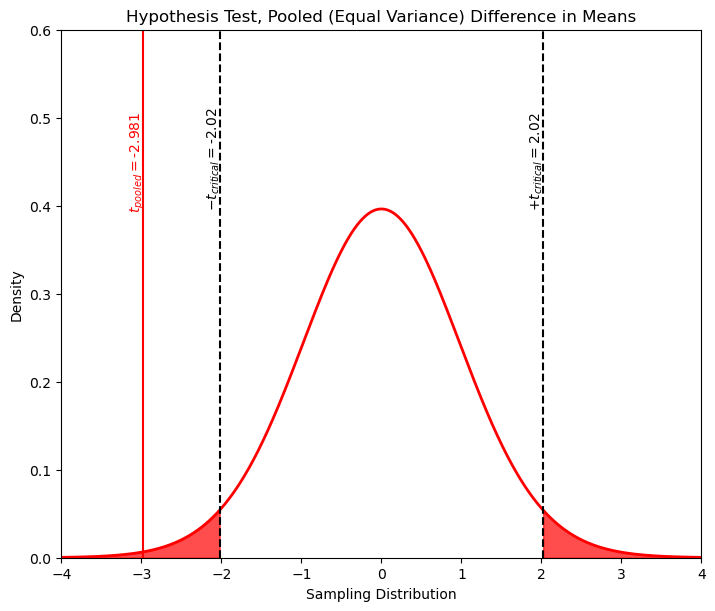

In [19]:
xval = np.linspace(-4.0,4.0,1000)
tpdf = stats.t.pdf(xval,loc=0,df=dof,scale=1.0)
plt.plot(xval,tpdf,color='red',lw=2); plt.xlabel('Sampling Distribution'); plt.ylabel('Density') 
plt.title('Hypothesis Test, Pooled (Equal Variance) Difference in Means')
plt.xlim([-4.0,4.0]); plt.ylim([0,0.6])

plt.annotate('$-t_{critical} = $' + str(t_critical[0]),[t_critical[0]-0.18,0.4],rotation=90.0)
plt.annotate('$+t_{critical} = $' + str(t_critical[1]),[t_critical[1]-0.18,0.4],rotation=90.0)
plt.annotate('$t_{pooled} = $' + str(np.round(t_pooled,3)),[t_pooled-0.18,0.4],rotation=90.0,color='red')
    
plt.fill_between(xval,tpdf,where= xval < t_critical[0], color='red',alpha=0.7)
plt.fill_between(xval,tpdf,where= xval > t_critical[1], color='red',alpha=0.7)
plt.vlines(t_critical,0,7,color='black',ls='--')
plt.vlines(t_pooled,0,0.7,color='red')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.3, hspace=0.4); plt.show()

#### Welch's t-test Difference in Means 

Now let's try the t-test, hypothesis test for difference in means allowing for unequal variances, this is also known as the Welch's t test, with the same hypotheses as above,  

$$
H_0: \mu_{X1} = \mu_{X2}
$$

$$
H_1: \mu_{X1} \ne \mu_{X2}
$$

All we have to do is set the parameter 'equal_var' to false, note it defaults to true (e.g. the command above). 

In [21]:
t_Welch,p_Welch = stats.ttest_ind(X1, X2, equal_var = False) # allowing for difference in variance
print('The t statistic is ' + str(np.round(t_Welch,2)) + ' and the p-value is ' + str(np.round(p_Welch,5)))

The t statistic is -2.98 and the p-value is 0.0055


Once again we can see by $p$ that we will clearly reject the null hypothesis.  

Now let's plot the result,

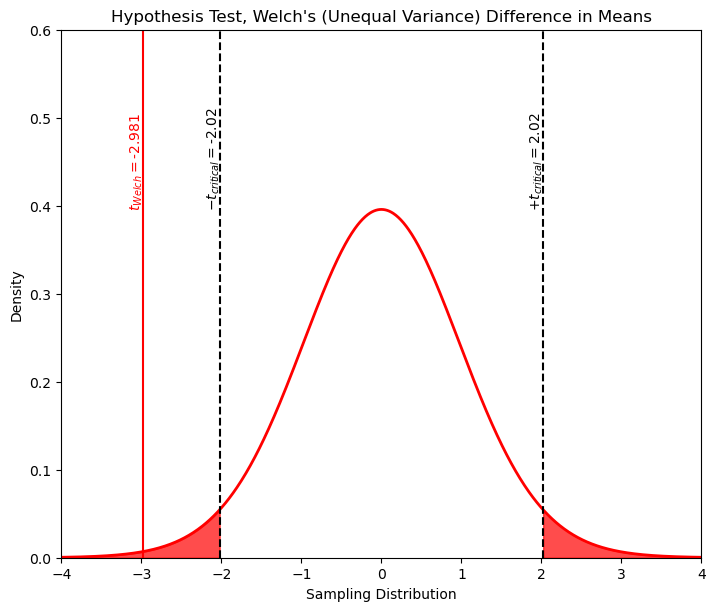

In [23]:
xval = np.linspace(-4.0,4.0,1000)
tpdf = stats.t.pdf(xval,loc=0,df=welch_dof(X1,X2),scale=1.0)
plt.plot(xval,tpdf,color='red',lw=2); plt.xlabel('Sampling Distribution'); plt.ylabel('Density'); 
plt.title('Hypothesis Test, Welch\'s (Unequal Variance) Difference in Means')
plt.xlim([-4.0,4.0]); plt.ylim([0,0.6])

plt.annotate(r'$-t_{critical} = $' + str(t_critical[0]),[t_critical[0]-0.18,0.4],rotation=90.0)
plt.annotate(r'$+t_{critical} = $' + str(t_critical[1]),[t_critical[1]-0.18,0.4],rotation=90.0)
plt.annotate(r'$t_{Welch} = $' + str(np.round(t_Welch,3)),[t_Welch-0.18,0.4],rotation=90.0,color='red')
    
plt.fill_between(xval,tpdf,where= xval < t_critical[0], color='red',alpha=0.7)
plt.fill_between(xval,tpdf,where= xval > t_critical[1], color='red',alpha=0.7)
plt.vlines(t_critical,0,7,color='black',ls='--')
plt.vlines(t_pooled,0,0.7,color='red')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.3, hspace=0.4); plt.show()

##### F-test Difference in Variances

Let's now compare the variances with the F-test for difference in variances.  

\begin{equation}
H_0: \frac{\sigma^{2}_{X_2}}{\sigma^{2}_{X_1}} = 1.0
\end{equation}

\begin{equation}
H_1: \frac{\sigma^{2}_{X_2}}{\sigma^{2}_{X_1}} > 1.0
\end{equation}

Note, by ordering the variances we eliminate the case of $\sigma^{2}_{X_2} \lt \sigma^{2}_{X_1}$.

Details about the test are available in the course notes (along with assumptions such as Gaussian distributed) and this example is also worked out by hand in the linked Excel workbook.  We can accomplish the F-test in with SciPy.Stats the function with one line of code if we calculate the ratio of the sample variances ensuring that the larger variance is in the numerator and get the degrees of freedom using the len() command, ensuring that we are consistent with the numerator degrees of freedom set as 'dfn' and the denominator degrees of freedom set as 'dfd'.  We take a p-value of $1-p$ since the test is configured to be a single, right tailed test.    

In [25]:
p_value = 1 - stats.f.cdf(np.var(X2)/np.var(X1), dfn=len(X2)-1, dfd=len(X1)-1)
p_value

0.01918734806315381

Once again we would clearly reject the null hypothesis since $p \lt alpha$ and assume that the variances are not equal.

#### Compact Code Solution - Hypothesis Test, Student's t-test for Difference in Means

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv')
X1 = df['X1'].values; X2 = df['X2'].values

alpha = 0.05
t_critical = stats.t.ppf(alpha/2,len(X1)+len(X2)-2)
t_pooled, p_pooled = stats.ttest_ind(X1,X2)                 # assuming equal variance
if(t_pooled < t_critical or t_pooled > -1*t_critical):
    print('Equal Variance: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_pooled,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, reject the null hypothesis')
else:
    print('Equal Variance: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_pooled,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, fail to reject the null hypothesis')
    
    alpha = 0.05
t_critical = stats.t.ppf(alpha/2,len(X1)+len(X2)-2)

t_welch, p_welch = stats.ttest_ind(X1,X2,equal_var = False) # assuming unequal variance, Welch's t-test
if(t_welch < t_critical or welch > -1*t_critical):
    print('Welch\'s test: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_welch,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, reject the null hypothesis')
else:
    print('Welch\'s test: t-critical and t-statistic are ' + str(np.round(t_critical,2)) + ' ≤ ' + str(np.round(t_welch,2)) + 
      ' ≤ ' + str(np.round(-1*t_critical,2)) + '; therefore, fail to reject the null hypothesis')

Equal Variance: t-critical and t-statistic are -2.02 ≤ -2.98 ≤ 2.02; therefore, reject the null hypothesis
Welch's test: t-critical and t-statistic are -2.02 ≤ -2.98 ≤ 2.02; therefore, reject the null hypothesis


#### Compact Code Solution - Hypothesis Test, F-test for Difference in Variances

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv')
X1 = df['X1'].values; X2 = df['X2'].values

alpha = 0.05
var_X1 = np.var(X1,ddof=1); var_X2 = np.var(X2,ddof=1)      # sample variance
f_stat = np.max([var_X1,var_X2])/np.min([var_X1,var_X2])
if var_X1 > var_X2:
    f_critical = stats.f.ppf(1-alpha,len(X1)-1,len(X2)-1) 
else:
    f_critical = stats.f.ppf(1-alpha,len(X2)-1,len(X1)-1) 
if f_stat > f_critical:
    print('f-statistic and f-critical are ' + str(np.round(f_stat,2)) + ' > ' + str(np.round(f_critical,2)) 
          + '; therefore, reject the null hypothesis')
else:
    print('f-statistic and f-critical are ' + str(np.round(f_stat,2)) + ' ≤ ' + str(np.round(f_critical,2)) 
          + '; therefore, fail to reject the null hypothesis')

f-statistic and f-critical are 2.67 > 2.17; therefore, reject the null hypothesis


#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)